## LEAD LAG CORRELATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def lowpass_scipy(signal,sample_freq,time_period,keep_mean):
    import numpy as np
    import scipy as sc
    from scipy import fftpack
    
    lowpass_signal=np.zeros(signal.shape)
    if any(np.isnan(signal)):
        raise ValueError('There is NaN in the signal')
    else:
        hf = 1./time_period

        temp_fft = sc.fftpack.fft(signal)

        fftfreq = np.fft.fftfreq(len(signal),sample_freq) ### daily data it is 1./365 ## monthly data 1./12 ## yearly data=1
          
        i1 = np.abs(fftfreq) >= hf  
        
        temp_fft[i1] = 0
        if not(keep_mean):
            temp_fft[0]=0
        lowpass_signal= np.real_if_close(sc.fftpack.ifft(temp_fft))
    
    return lowpass_signal

In [3]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

#d2 = data.iloc[:,12]
#d1 = data.iloc[:,13]

_

''

In [4]:
st = 1979
en = 2008
st1 =1951
en1 =1978
st2 =1906
en2 =2014

## Convolution1D

In [5]:
df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/conv1d/ensamble3/ensamble_conv1d_jgrjd_rmm1_p1.csv')
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()


df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/conv1d/ensamble3/ensamble_conv1d_jgrjd_rmm2.csv')
df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()





d1_ensemble = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_ensemble = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]


d1_ensemble_1 = df1['rmm1'][(df1.index >= datetime.datetime(st1,1,1)) & (df1.index  <= datetime.datetime(en1,12,31))]
d2_ensemble_1 = df2['rmm2'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]

d1_ensemble_2 = df1['rmm1'][(df1.index >= datetime.datetime(st2,1,1)) & (df1.index  <= datetime.datetime(en2,12,31))]
d2_ensemble_2 = df2['rmm2'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]

In [6]:
rs_ensemble         = [crosscorr(d2_ensemble,d1_ensemble, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_ensemble=np.asarray(rs_ensemble)
print(lags[rs_ensemble==rs_ensemble.max()],rs_ensemble.max())
lr_ensemble= [lags[rs_ensemble==rs_ensemble.max()],rs_ensemble.max()]


[9] 0.6544309607887895


## CONV 2D

In [7]:
df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN/rmm1_conv_minmaxscale_1905_2015.csv')
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()


df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN/rmm2_conv_minmaxscale_1905_2015.csv')
df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()





d1_c2d = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_c2d = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]


d1_c2d_1 = df1['rmm1'][(df1.index >= datetime.datetime(st1,1,1)) & (df1.index  <= datetime.datetime(en1,12,31))]
d2_c2d_1 = df2['rmm2'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]

d1_c2d_2 = df1['rmm1'][(df1.index >= datetime.datetime(st2,1,1)) & (df1.index  <= datetime.datetime(en2,12,31))]
d2_c2d_2 = df2['rmm2'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]

In [8]:
rs_c2d         = [crosscorr(d2_c2d,d1_c2d, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_c2d=np.asarray(rs_c2d)
print(lags[rs_c2d==rs_c2d.max()],rs_c2d.max())
lr_c2d= [lags[rs_c2d==rs_c2d.max()],rs_c2d.max()]


[9] 0.5786493633434422


## OLIVER INDEX

In [9]:
df2 = pd.read_csv('rmm_oliver_20CRv3.csv')
df2['Datetime'] = df2.year.map(str) + '-' + df2.month.map(str) + '-'+df2.day.map(str) 
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)

df2['IHR1'] = df2[['IHR1']]/df2['IHR1'].loc['1979-01-01':'2008-12-31'].std()
df2['IHR2'] = df2[['IHR2']]/df2['IHR2'].loc['1979-01-01':'2008-12-31'].std()


d1_ol = df2['IHR1'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]
d2_ol = df2['IHR2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]


d1_ol_1 = df2['IHR1'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]
d2_ol_1 = df2['IHR2'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]

d1_ol_2 = df2['IHR1'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]
d2_ol_2 = df2['IHR2'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]

In [10]:
rs_ol         = [crosscorr(d2_ol,d1_ol, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_ol=np.asarray(rs_ol)
print(lags[rs_ol==rs_ol.max()],rs_ol.max())
lr_ol= [lags[rs_ol==rs_ol.max()],rs_ol.max()]


[8] 0.6190141997813374


## MLR

In [11]:
df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/multiple_regression/rmm1_MLR_org.txt')
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()


df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/multiple_regression/rmm2_MLR_org.txt')
df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()





d1_mlr = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_mlr = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]


d1_mlr_1 = df1['rmm1'][(df1.index >= datetime.datetime(st1,1,1)) & (df1.index  <= datetime.datetime(en1,12,31))]
d2_mlr_1 = df2['rmm2'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]

d1_mlr_2 = df1['rmm1'][(df1.index >= datetime.datetime(st2,1,1)) & (df1.index  <= datetime.datetime(en2,12,31))]
d2_mlr_2 = df2['rmm2'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]

In [12]:
rs_mlr         = [crosscorr(d2_mlr,d1_mlr, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_mlr=np.asarray(rs_mlr)
print(lags[rs_mlr==rs_mlr.max()],rs_mlr.max())
lr_mlr= [lags[rs_mlr==rs_mlr.max()],rs_mlr.max()]


[7] 0.5813087969503807


## SVR

In [13]:
df1 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/SVR/rmm1_1905_2015_svr_org_new.txt')
df1.columns = ['Datetime','rmm1']
df1.index = pd.to_datetime(df1.Datetime)
df1 = df1.drop('Datetime',axis=1)
df1 = df1[['rmm1']]/df1['rmm1'].loc['1979-01-01':'2008-12-31'].std()


df2 = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/SVR/rmm2_1905_2015_svr_org_new.txt')
df2.columns = ['Datetime','rmm2']
df2.index = pd.to_datetime(df2.Datetime)
df2 = df2.drop('Datetime',axis=1)
df2 = df2[['rmm2']]/df2['rmm2'].loc['1979-01-01':'2008-12-31'].std()





d1_svr = df1['rmm1'][(df1.index >= datetime.datetime(st,1,1)) & (df1.index  <= datetime.datetime(en,12,31))]
d2_svr = df2['rmm2'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]


d1_svr_1 = df1['rmm1'][(df1.index >= datetime.datetime(st1,1,1)) & (df1.index  <= datetime.datetime(en1,12,31))]
d2_svr_1 = df2['rmm2'][(df2.index >= datetime.datetime(st1,1,1)) & (df2.index  <= datetime.datetime(en1,12,31))]

d1_svr_2 = df1['rmm1'][(df1.index >= datetime.datetime(st2,1,1)) & (df1.index  <= datetime.datetime(en2,12,31))]
d2_svr_2 = df2['rmm2'][(df2.index >= datetime.datetime(st2,1,1)) & (df2.index  <= datetime.datetime(en2,12,31))]

In [14]:
rs_svr         = [crosscorr(d2_svr,d1_svr, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_svr=np.asarray(rs_svr)
print(lags[rs_svr==rs_svr.max()],rs_svr.max())
lr_svr= [lags[rs_svr==rs_svr.max()],rs_svr.max()]


[8] 0.5922497665546124


## WH04 RMM 

In [15]:
rmm         = pd.read_csv('/home/cccr/supriyo/panini/filtered_data/historical/20CRV2_analysis/rmm_index.csv')
rmm.columns = ['date','rmm1','rmm2']
rmm.index   = pd.to_datetime(rmm.date)
d1_wh04 = rmm['rmm1'].loc[str(st)+'-01-01':str(en)+'-12-31']
d2_wh04 = rmm['rmm2'].loc[str(st)+'-01-01':str(en)+'-12-31']


## Filtered RMM 

In [16]:
d11=lowpass_scipy(d1_wh04,1,10,1)
d11 = pd.Series(d11,index=d1_wh04.index)

d22=lowpass_scipy(d2_wh04,1,10,1)
d22 = pd.Series(d22,index=d2_wh04.index)



In [17]:
rs_wh04_filt         = [crosscorr(d22,d11, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_wh04_filt=np.asarray(rs_wh04_filt)
print(lags[rs_wh04_filt==rs_wh04_filt.max()],rs_wh04_filt.max())
lr_wh04 = lags[rs_wh04_filt==rs_wh04_filt.max()],rs_wh04_filt.max()

[9] 0.5761699765950392


## JRA55 index

In [18]:
df_jra = pd.read_excel('/home/cccr/supriyo/panini/filtered_data/data/jra55_mjo_index.xlsx')
df_jra['Datetime'] = df_jra.year.map(str) + '-' + df_jra.month.map(str) + '-'+df_jra.day.map(str) 
df_jra.index = pd.to_datetime(df_jra.Datetime)
df_jra = df_jra.drop('Datetime',axis=1)

d1_jra = df_jra['rmm1'][(df_jra.index >= datetime.datetime(st,1,1)) & (df_jra.index  <= datetime.datetime(en,12,31))]
d2_jra = df_jra['rmm2'][(df_jra.index >= datetime.datetime(st,1,1)) & (df_jra.index  <= datetime.datetime(en,12,31))]


d1_jra_1 = df_jra['rmm1'][(df_jra.index >= datetime.datetime(st1,1,1)) & (df_jra.index  <= datetime.datetime(en1,12,31))]
d2_jra_1 = df_jra['rmm2'][(df_jra.index >= datetime.datetime(st1,1,1)) & (df_jra.index  <= datetime.datetime(en1,12,31))]

d1_jra_2 = df_jra['rmm1'][(df_jra.index >= datetime.datetime(st2,1,1)) & (df_jra.index  <= datetime.datetime(en2,12,31))]
d2_jra_2 = df_jra['rmm2'][(df_jra.index >= datetime.datetime(st2,1,1)) & (df_jra.index  <= datetime.datetime(en2,12,31))]

In [19]:
rs_jra         = [crosscorr(d2_jra,d1_jra, lag) for lag in range(-25,26)]
lags = np.arange(-25,26);
rs_jra=np.asarray(rs_jra)
print(lags[rs_jra==rs_jra.max()],rs_jra.max())
lr_jra = lags[rs_jra==rs_jra.max()],rs_jra.max()

[9] 0.6468685230929543


In [20]:
def crosscorr_len(x,y,lags,opt):
    x = x-x.mean(); y =y -y.mean()
    k=0
    crosscorr=np.zeros(len(lags))
    for i in lags:
        if i<0:
            i1=np.abs(i)
            y11 =  x[:-i1]
            y22  =  y[i1:]
            crosscorr[k]=np.corrcoef(y11,y22)[0,1]
        elif i==0:
            y11=x*1
            y22=y*1
            crosscorr[k]=np.corrcoef(y11,y22)[0,1]
        else:
            y11 =  x[i:]
            y22  =  y[:-i]
            crosscorr[k]=np.corrcoef(y11,y22)[0,1]
        k=k+1
        if opt:
            plt.bar(lags,crosscorr)
       
    return crosscorr



def crosscorr_sho(x,y,opt):
    x = x-x.mean(); y =y -y.mean();
    npts = len(x)
    lags = np.arange(-npts+1,npts)
    ccov = np.correlate(x,y,mode = 'full')
    ccor = ccov/(npts* x.std()*y.std())
    if opt:
        plt.bar(lags,ccor)
    return lags,ccor
# crosscorr_len(d2_jra,d1_jra,lags=np.arange(-50,50,1),opt=1)

In [21]:
lr_all =[lr_ensemble,lr_ol,lr_wh04,lr_mlr,lr_svr,lr_jra]
lr_all

[[array([9]), 0.6544309607887895],
 [array([8]), 0.6190141997813374],
 (array([9]), 0.5761699765950392),
 [array([7]), 0.5813087969503807],
 [array([8]), 0.5922497665546124],
 (array([9]), 0.6468685230929543)]

## compute lag correlation

/home/cccr/supriyo/.conda/envs/environment1/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1, 'Lag-correlation')

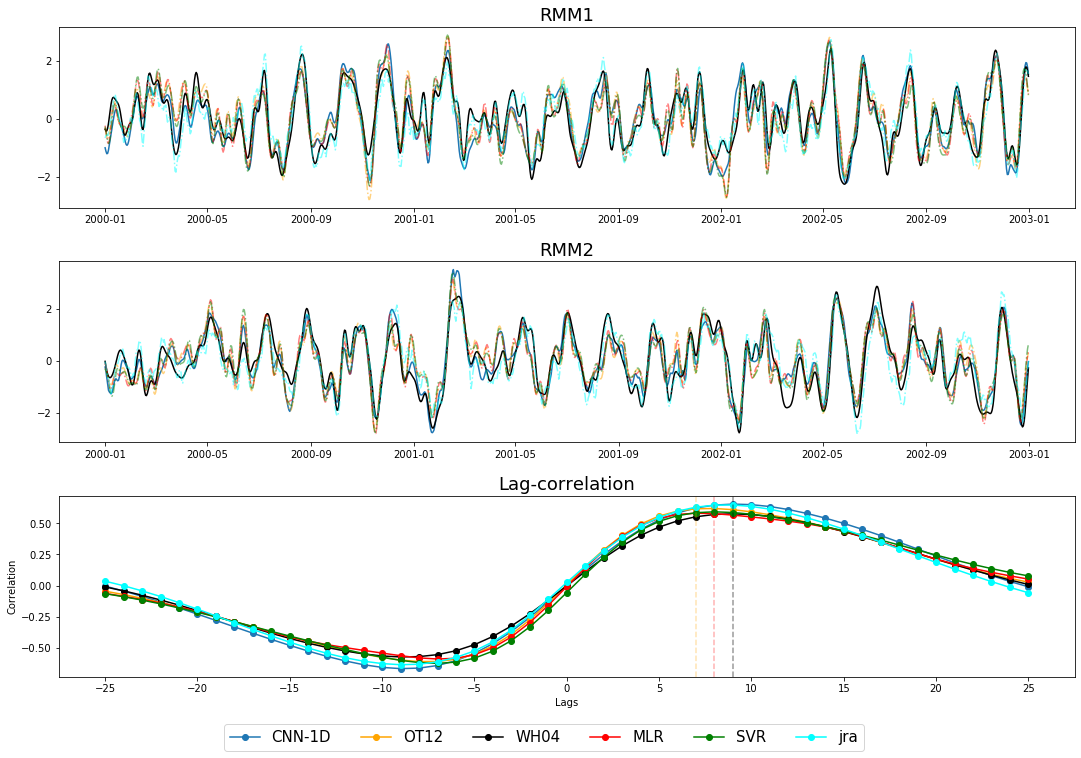

In [22]:
import matplotlib.dates as mdates

fig,ax = plt.subplots(3,1,figsize=(15,10))
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 15
plt.rcParams['image.cmap'] = 'seismic'

#### RMM1 and RMM2 plot

ax[0].plot(d1_ensemble['2000-01-01':'2002-12-31'])
ax[0].plot(d1_ol['2000-01-01':'2002-12-31'],'-.',color='orange',alpha=0.5)
ax[0].plot(d11['2000-01-01':'2002-12-31'],'k')
ax[0].plot(d1_mlr['2000-01-01':'2002-12-31'],'-.',color='red',alpha=0.5)
ax[0].plot(d1_svr['2000-01-01':'2002-12-31'],'-.',color='green',alpha=0.5)
# ax[0].plot(d1_c2d['2000-01-01':'2002-12-31'],'-.',color='magenta',alpha=0.5)
ax[0].plot(d1_jra['2000-01-01':'2002-12-31'],'-.',color='cyan',alpha=0.5)

ax[0].set_title('RMM1')

ax[1].plot(d2_ensemble['2000-01-01':'2002-12-31'],)
ax[1].plot(d2_ol['2000-01-01':'2002-12-31'],'-.',color='orange',alpha=0.5)
ax[1].plot(d22['2000-01-01':'2002-12-31'],'k',label='Wh04')
ax[1].plot(d2_mlr['2000-01-01':'2002-12-31'],'-.',alpha=0.5,color='red')
ax[1].plot(d2_svr['2000-01-01':'2002-12-31'],'-.',alpha=0.5,color='green')
# ax[1].plot(d2_c2d['2000-01-01':'2002-12-31'],'-.',alpha=0.5,color='magenta')
ax[1].plot(d2_jra['2000-01-01':'2002-12-31'],'-.',alpha=0.5,color='cyan')

ax[1].set_title('RMM2')


#### plot lag correlation

ax[2].plot(np.arange(-25,26),rs_ensemble,label = 'CNN-1D',marker='o',color='C0')
ax[2].plot(np.arange(-25,26),rs_ol,label = 'OT12',marker='o',color='orange')
ax[2].plot(np.arange(-25,26),rs_wh04_filt,label ='WH04',marker='o',color='k')
ax[2].plot(np.arange(-25,26),rs_mlr,label ='MLR',marker='o',color='red')
ax[2].plot(np.arange(-25,26),rs_svr,label ='SVR',marker='o',color='green')
# ax[2].plot(np.arange(-25,25),rs_c2d,label ='c2d',marker='o')
ax[2].plot(np.arange(-25,26),rs_jra,label ='jra',marker='o',color='cyan')


ax[2].set_xticks([-25, -20, -15,-10,-5, 0,5, 10,15, 20,25])
ax[2].axvline(7,color='orange',alpha=0.3,linestyle='--')
ax[2].axvline(8,color='r',alpha=0.3,linestyle='--')
ax[2].axvline(9,color='k',alpha=0.4,linestyle='--')
# ax[2].axvline(9,color='b',alpha=0.4,linestyle='-.')

fig.tight_layout(pad=1.1)
# ax.axvline(0,color='k',linestyle='--')
plt.legend(bbox_to_anchor=(0.8,-0.45),loc="lower right",ncol=6)
# plt.legend(bbox_to_anchor=(1.15,1.5),loc="right",ncol=1)

plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Lag-correlation')
# plt.savefig('/home/cccr/supriyo/panini/very_low_jgrjd_figure2.png',dpi=300,bbox_inches='tight')

In [23]:
# %store -z
%store rs_ensemble
%store rs_ol
%store rs_wh04_filt
%store rs_mlr
%store rs_svr
%store rs_jra

Stored 'rs_ensemble' (ndarray)
Stored 'rs_ol' (ndarray)
Stored 'rs_wh04_filt' (ndarray)
Stored 'rs_mlr' (ndarray)
Stored 'rs_svr' (ndarray)
Stored 'rs_jra' (ndarray)


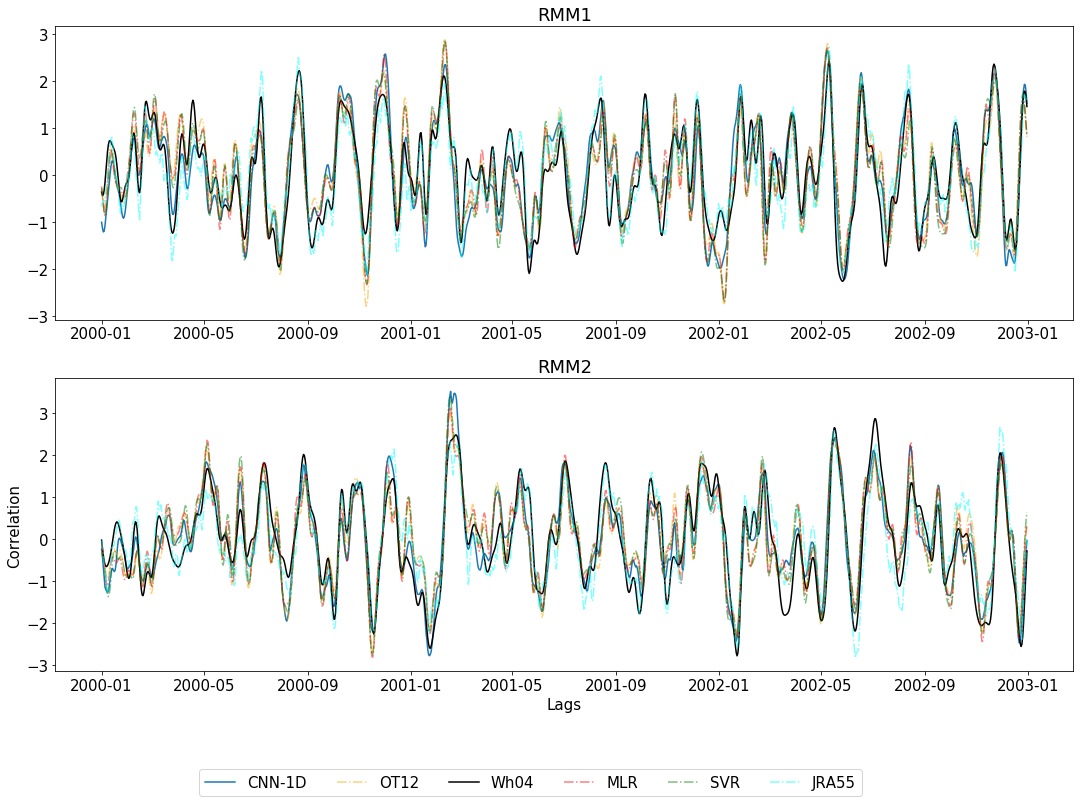

In [32]:
import matplotlib.dates as mdates

fig,ax = plt.subplots(2,1,figsize=(15,10))
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 15
plt.rcParams['image.cmap'] = 'seismic'

#### RMM1 and RMM2 plot

ax[0].plot(d1_ensemble['2000-01-01':'2002-12-31'])
ax[0].plot(d1_ol['2000-01-01':'2002-12-31'],'-.',color='orange',alpha=0.5)
ax[0].plot(d11['2000-01-01':'2002-12-31'],'k')
ax[0].plot(d1_mlr['2000-01-01':'2002-12-31'],'-.',color='red',alpha=0.5)
ax[0].plot(d1_svr['2000-01-01':'2002-12-31'],'-.',color='green',alpha=0.5)
# ax[0].plot(d1_c2d['2000-01-01':'2002-12-31'],'-.',color='magenta',alpha=0.5)
ax[0].plot(d1_jra['2000-01-01':'2002-12-31'],'-.',color='cyan',alpha=0.5)

ax[0].set_title('RMM1')

ax[1].plot(d2_ensemble['2000-01-01':'2002-12-31'],label='CNN-1D')
ax[1].plot(d2_ol['2000-01-01':'2002-12-31'],'-.',label='OT12',color='orange',alpha=0.5)
ax[1].plot(d22['2000-01-01':'2002-12-31'],'k',label='Wh04')
ax[1].plot(d2_mlr['2000-01-01':'2002-12-31'],'-.',label='MLR',alpha=0.5,color='red')
ax[1].plot(d2_svr['2000-01-01':'2002-12-31'],'-.',label='SVR',alpha=0.5,color='green')
# ax[1].plot(d2_c2d['2000-01-01':'2002-12-31'],'-.',alpha=0.5,color='magenta')
ax[1].plot(d2_jra['2000-01-01':'2002-12-31'],'-.',label='JRA55',alpha=0.5,color='cyan')

ax[1].set_title('RMM2')
fig.tight_layout(pad=1.1)
# ax.axvline(0,color='k',linestyle='--')
plt.legend(bbox_to_anchor=(0.8,-0.45),loc="lower right",ncol=6)
# plt.legend(bbox_to_anchor=(1.15,1.5),loc="right",ncol=1)

plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.savefig('/home/cccr/supriyo/panini/jgrjd_figure/modified_revision/jgrjd_supplementary_Figure1.jpg',dpi=300,bbox_inches='tight')

In [25]:
np.corrcoef(d2_ensemble['1958-01-01':'1979-12-31'],d2_jra['1958-01-01':'1979-12-31'])

array([[1.        , 0.88102674],
       [0.88102674, 1.        ]])

### all in one

Text(0.5, 1.0, '1906-2014')

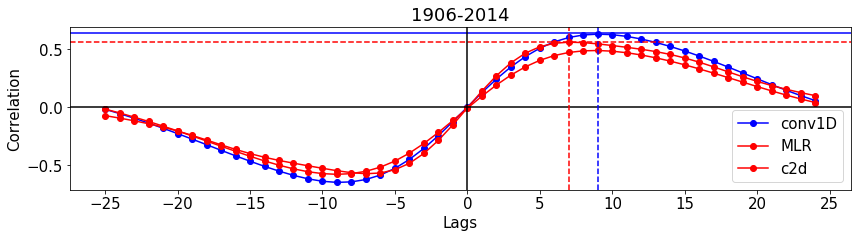

In [26]:
rs_mlr_2 = [crosscorr(d2_mlr_2,d1_mlr_2, lag) for lag in range(-25,25)]
rs_ensemble_2 = [crosscorr(d2_ensemble_2,d1_ensemble_2, lag) for lag in range(-25,25)]
rs_c2d_2 = [crosscorr(d2_c2d_2,d1_ensemble_2, lag) for lag in range(-25,25)]
rs_ol_2         = [crosscorr(d2_ol_2,d1_ol_2, lag) for lag in range(-25,25)]

f,ax=plt.subplots(figsize=(14,3))
# ax.plot(np.arange(-25,25),rs_wh04_filt,label ='wh04')
ax.plot(np.arange(-25,25),rs_ensemble_2,label ='conv1D',marker='o',color='blue')
ax.plot(np.arange(-25,25),rs_mlr_2,label = 'MLR',marker='o',color ='red')
ax.plot(np.arange(-25,25),rs_c2d_2,label = 'c2d',marker='o',color ='red')


ax.axhline(0.64,linestyle='-',color='b')
ax.axhline(0.56,linestyle='--',color='red')
ax.axhline(0.0,linestyle='-',color='k')
ax.set_xticks([-25, -20, -15,-10,-5, 0,5, 10,15, 20,25])
ax.axvline(7,color='red',linestyle='--')
ax.axvline(9,color='blue',linestyle='--')
ax.axvline(0,color='k',linestyle='-')
plt.legend()
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('1906-2014')

In [27]:
print(np.max(rs_mlr),np.max(rs_mlr_2),np.max(rs_ensemble),np.max(rs_ensemble_2))

0.5813087969503807 0.5597445440664447 0.6544309607887895 0.6288270023298552


## example of large lag correlation

In [28]:
matrix1=np.loadtxt('/home/cccr/supriyo/panini/bimodal_iso_index_mjo.txt',usecols=range(8),skiprows=1)
year=matrix1[:,0]
df2 = pd.DataFrame(matrix1,columns=['year', 'mon', 'day', 'PCx', 'PCy', 'phase', 'Amp(nrm)','Amp(non-nrm)'])
df2.index= pd.date_range(start='22/03/1979', periods=len(df2))



# df2.index = pd.to_datetime(df2.Datetime)
# df2 = df2.drop('Datetime',axis=1)

d1_bmo = df2['PCx'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]
d2_bmo = df2['PCy'][(df2.index >= datetime.datetime(st,1,1)) & (df2.index  <= datetime.datetime(en,12,31))]




0.8500788394828782

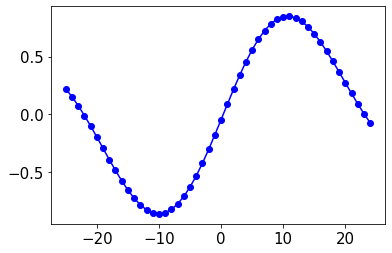

In [29]:
rs_bmo= [crosscorr(d2_bmo,d1_bmo, lag) for lag in range(-25,25)]
plt.plot(np.arange(-25,25),rs_bmo,label ='ensemble',marker='o',color='blue')
np.max(rs_bmo)

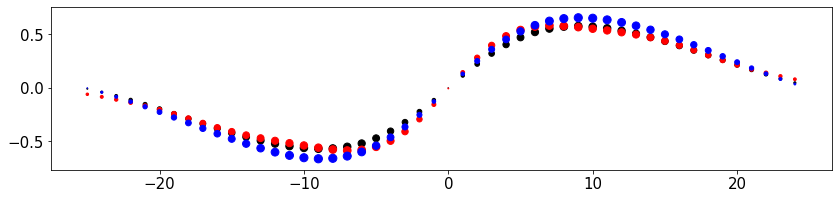

In [30]:
rs_wh04_filt = [crosscorr(d22,d11, lag) for lag in range(-25,25)]
rs_ensemble = [crosscorr(d2_ensemble,d1_ensemble, lag) for lag in range(-25,25)]
rs_mlr= [crosscorr(d2_mlr,d1_mlr, lag) for lag in range(-25,25)]
# rs_ol= [crosscorr(d2_ol,d1_ol, lag) for lag in range(-25,25)]

f,ax=plt.subplots(figsize=(14,3))
ax.scatter(np.arange(-25,25),rs_wh04_filt,label ='wh04',marker='o',s= 100*np.abs(rs_wh04_filt),color='k')
ax.scatter(np.arange(-25,25),rs_mlr,label ='MLR',marker='o',color='red',s= 100*np.abs(rs_mlr))
ax.scatter(np.arange(-25,25),rs_ensemble,label = 'conv1D',marker='o',color='blue',s= 100*np.abs(rs_ensemble))
# ax.axhline(0.66,linestyle='--',color='b')
# ax.axhline(0.56,linestyle='--',color='k')
# ax.axhline(0.0,linestyle='-',color='k')
# ax.set_xticks([-25, -20, -15,-10,-5, 0,5, 10,15, 20,25])
# ax.axvline(7,color='r',linestyle='--')
# ax.axvline(9,color='k',linestyle='--')
# ax.axvline(0,color='k',linestyle='-')
# plt.legend()
# plt.xlabel('Lags')
# plt.ylabel('Correlation')
# plt.title('1979-2014')